<a href="https://colab.research.google.com/github/BrockH3/ML_Project/blob/main/ML_Final_Project_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf


In [ ]:
data = yf.Ticker("ETH-USD").history(period='5y')
ordered_data = data.sort_values(by=['Date'])

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(data))

X_train_temp = ordered_data[:split]
X_test_temp = ordered_data[split:]

In [ ]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()
denormalizer = StandardScaler()

varlist =  ['Open', 'High', 'Low','Volume']

Y_train = X_train_temp['Close']
Y_test = X_test_temp['Close']

num_train = len(Y_train)
num_test = len(Y_test)

X_train = np.c_[np.ones((num_train, 1)), X_train_temp[varlist]]
X_test = np.c_[np.ones((num_test, 1)), X_test_temp[varlist]]

X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVR
from sklearn import metrics

# Polynomial kernel SVR
poly_svr = SVR(kernel='poly', degree=2, C=1E3)
poly_svr.fit(X_train, Y_train)
Y_prediction_poly = poly_svr.predict(X_test)

mse_poly = mean_squared_error(Y_test, Y_prediction_poly)

print(f'Polynomial Kernel MSE Loss: {mse_poly}')

# Linear kernel SVR
linear_svr = SVR(kernel='linear', C=1E3)
linear_svr.fit(X_train, Y_train)
Y_prediction_linear = linear_svr.predict(X_test)

mse_linear = mean_squared_error(Y_test, Y_prediction_linear)

print(f'Linear Kernel MSE Loss: {mse_linear}')

# RBF kernel SVR
rbf_svr = SVR(kernel='rbf', C=1E3)
rbf_svr.fit(X_train, Y_train)
Y_prediction_rbf = rbf_svr.predict(X_test)

mse_rbf = mean_squared_error(Y_test, Y_prediction_rbf)

print(f'RBF Kernel MSE Loss: {mse_rbf}')

# Sigmoid kernel SVR
sigmod_svr = SVR(kernel='sigmoid', C=1E3)
sigmod_svr.fit(X_train, Y_train)
Y_prediction_sigmoid = sigmod_svr.predict(X_test)

mse_sigmoid = mean_squared_error(Y_test, Y_prediction_sigmoid)

print(f'Sigmoid Kernel MSE Loss: {mse_sigmoid}')

Polynomial Kernel MSE Loss: 2245150.6041561337
Linear Kernel MSE Loss: 1332773.8761739153
RBF Kernel MSE Loss: 657686.0772077679
Sigmoid Kernel MSE Loss: 2872529938.7594066


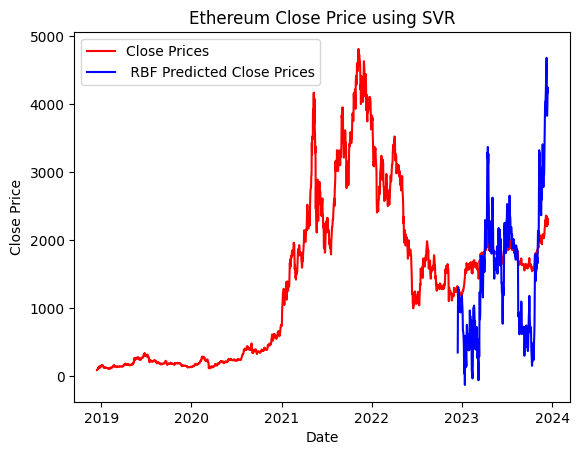

In [ ]:
#Best SVR Models
# Plotting the results
plt.figure()
plt.plot(ordered_data.index, ordered_data['Close'], color='red', label='Close Prices')
plt.plot(X_test_temp.index, Y_prediction_rbf, color='blue', label=' RBF Predicted Close Prices')
#plt.plot(X_test_temp.index, Y_prediction_linear, color='yellow', label=' Linear Predicted Close Prices')
plt.title('Ethereum Close Price using SVR')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()